I grabbed the data on soybean from https://www.nass.usda.gov/Quick_Stats/Lite/index.php , thought it was much more intuitive than the traditional quickstats. I also found out that Minnesota is one of the top states for producing Soybeans, so let's see if I can do a little bit with this data and hopefully find ways to generalize these methods further on. 

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('husl')
sns.set_style('whitegrid')
%matplotlib inline

In [7]:
soybeans = pd.read_csv('../data/SOYBEANS-AcreageYieldProductionandPrice-2019-11-11.csv')

In [8]:
soybeans.columns

Index(['YEAR', 'LOCATION', 'STATE ANSI', 'ASD CODE', 'COUNTY ANSI',
       'REFERENCE PERIOD', 'COMMODITY', 'AREA HARVESTED in ACRES',
       'AREA PLANTED in ACRES', 'PRODUCTION in BU', 'YIELD in BU / ACRE',
       'PRODUCTION in $', 'PRICE RECEIVED in $ / BU'],
      dtype='object')

In [9]:
soybeans['PRODUCTION in BU'] = soybeans['PRODUCTION in BU'].apply(lambda z:
  
                                                                  
                                                                  
                                                                  
                           z.replace(' ','0'))

soybeans['PRODUCTION in BU'] = soybeans['PRODUCTION in BU'].apply(lambda z:
  
                                                                  
                                                                  
                                                                  
                           z.replace(',',''))


soybeans['PRODUCTION in BU'] = soybeans['PRODUCTION in BU'].apply(lambda z:
  
                                                                  
                                                                  
                                                                  
                           float(z))

In [10]:
soybeans.columns

Index(['YEAR', 'LOCATION', 'STATE ANSI', 'ASD CODE', 'COUNTY ANSI',
       'REFERENCE PERIOD', 'COMMODITY', 'AREA HARVESTED in ACRES',
       'AREA PLANTED in ACRES', 'PRODUCTION in BU', 'YIELD in BU / ACRE',
       'PRODUCTION in $', 'PRICE RECEIVED in $ / BU'],
      dtype='object')

Text(0.5, 1.0, 'Soybean By Year')

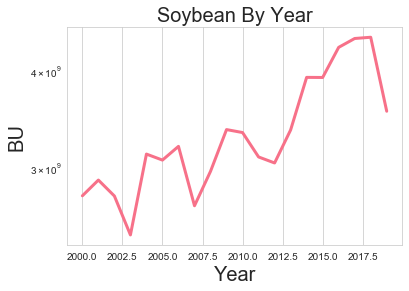

In [12]:
plt.plot(soybeans.groupby(['YEAR'])['PRODUCTION in BU'].sum(),linewidth=3)
plt.xlabel("Year",fontsize=20)
plt.ylabel("BU",fontsize=20)
plt.yscale('log')
plt.title("Soybean By Year",fontsize=20)

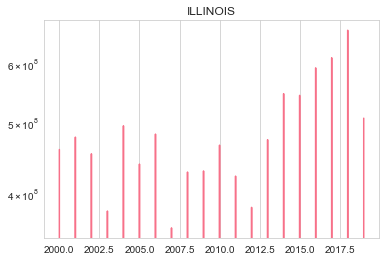

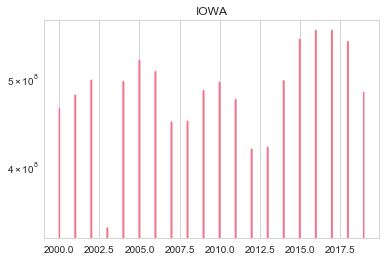

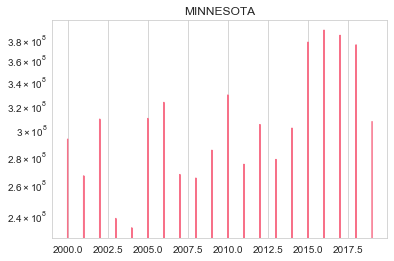

In [19]:
for state in soybeans.LOCATION.unique():
    if state in ['MINNESOTA','IOWA','ILLINOIS']:
        plt.figure()
        plt.yscale('log')
        plt.title(state)
        soy_state = soybeans.loc[soybeans['LOCATION'] == state]
        plt.plot(soy_state['YEAR'],soy_state['PRODUCTION in BU'])

Cool to get some form of a result, trouble is the columns are not as clean as before. Necessary tradeoff for a far easier data loading procedure. To fix this, I'll do the necessary cleaning below.

In [ ]:
soybeans.groupby("LOCATION")['PRODUCTION in BU'].sum().sort_values()

In [ ]:
soybeans.groupby(["LOCATION"])['PRODUCTION in BU'].std().sort_values()

To coincide these with other counties, the official way is STATE ANSI , COUNTY ANSI this will correspond to the official location. 

In [ ]:
soybeans.YEAR.unique()